In [64]:
## Import the necessary library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [65]:
## Upload and read the dataset
df = pd.read_csv('/content/revenue_prediction (3).csv')

In [66]:
df

,Id,Name,Franchise,Category,City,No_Of_Item,Order_Placed,Revenue
0,101,HungryHowie'sPizza,Yes,Mexican,Bengaluru,55,5.5,5953753
1,102,CharleysPhillySteaks,No,Varied Menu,Gurugram,72,6.8,7223131
2,103,Chuy's,Yes,Chicken,Pune,25,1.9,2555379
3,104,O'Charley's,Yes,Italian/Pizza,Mumbai,18,2.5,2175511
4,105,PolloTropical,Yes,Pizza,Noida,48,4.2,4816715
...,...,...,...,...,...,...,...,...
95,196,Wetzel'sPretzels,No,Italian/Pizza,Bengaluru,19,1.1,1270499
96,197,LaMadeleineCountryFrenchCafe,Yes,Varied Menu,Bengaluru,75,6.3,6412623
97,198,Giordano's,Yes,Varied Menu,Gurugram,77,6.2,6694797
98,199,IslandsFineBurgers&Drinks,Yes,Sports Bar,Pune,25,2.1,2344689


In [67]:
## check the shape of the data
df.shape

(100, 8)

In [68]:
##check the statistical part of the data
df.describe()

,Id,No_Of_Item,Order_Placed,Revenue
count,100.000000,100.000000,100.000000,1.000000e+02
mean,150.500000,49.080000,4.086000,4.395161e+06
std,29.011492,22.370923,2.055101,2.659932e+06
min,101.000000,18.000000,1.000000,8.498700e+05
25%,125.750000,34.750000,2.750000,2.688328e+06
50%,150.500000,45.000000,3.650000,3.911401e+06
75%,175.250000,57.250000,5.100000,5.330084e+06
max,200.000000,126.000000,13.000000,1.969694e+07


In [69]:
### Check info of the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Id            100 non-null    int64  
 1   Name          100 non-null    object 
 2   Franchise     100 non-null    object 
 3   Category      100 non-null    object 
 4   City          100 non-null    object 
 5   No_Of_Item    100 non-null    int64  
 6   Order_Placed  100 non-null    float64
 7   Revenue       100 non-null    int64  
dtypes: float64(1), int64(3), object(4)
memory usage: 6.4+ KB


In [70]:
## check the null the value
df.isnull().sum()

,0
Id,0
Name,0
Franchise,0
Category,0
City,0
No_Of_Item,0
Order_Placed,0
Revenue,0


In [71]:
## check the duplicate
df.duplicated().sum()

np.int64(0)

In [72]:
## Drop the irrelevant data
df.drop(['Id', 'Name', 'Franchise',	'Category',	'City',	'No_Of_Item'],axis=1,inplace=True)

In [73]:
df.head(7)

,Order_Placed,Revenue
0,5.5,5953753
1,6.8,7223131
2,1.9,2555379
3,2.5,2175511
4,4.2,4816715
5,4.9,4517319
6,5.0,5966635


In [74]:
## Taking the variable of the data
x = df['Order_Placed']
y = df['Revenue']

In [75]:
## split the data
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [76]:
## check the x_train
x_train

,Order_Placed
55,6.8
88,1.9
26,2.1
42,4.8
69,3.3
...,...
60,3.0
71,4.0
14,1.8
92,6.5


In [77]:
x_test

,Order_Placed
83,5.7
53,5.4
70,3.8
45,3.6
44,4.0
39,3.7
22,3.8
80,3.5
10,3.6
0,5.5


In [78]:
print(y_train)

55    6941173
88    2025297
26    2967425
42    4952255
69    3452382
       ...   
60    3164972
71    4136425
14    1099097
92    6782425
51    3273041
Name: Revenue, Length: 80, dtype: int64


In [79]:
print(y_test)

83    5966193
53    5595267
70    3982767
45    3752885
44    4264176
39    3818055
22    4956086
80    3727364
10    3945135
0     5953753
18    4937526
30    2408199
73    3347767
33    2371202
90    3426169
4     4816715
76    4590423
77    1904842
12    2234634
31    2358644
Name: Revenue, dtype: int64


# LINEAR REGRESSION MODEL

In [80]:
## import the linear regression model
from sklearn.linear_model import LinearRegression

In [81]:
lr = LinearRegression()

In [82]:
### train the model
lr.fit(x_train.values.reshape(-1,1),y_train)

LinearRegression()

In [83]:
y_pred = lr.predict(x_test.values.reshape(-1,1))

In [93]:
y_pred

array([6351103.23642517, 5984998.65773576, 4032440.90472562,
       3788371.18559935, 4276510.62385189, 3910406.04516249,
       4032440.90472562, 3666336.32603622, 3788371.18559935,
       6107033.5172989 , 5740928.9386095 , 2934127.16865742,
       3178196.88778369, 2079883.15171548, 3422266.60690995,
       4520580.34297816, 4642615.20254129, 1469708.85389981,
       1347673.99433668, 1713778.57302608])

# **Visualizing the Training set result**


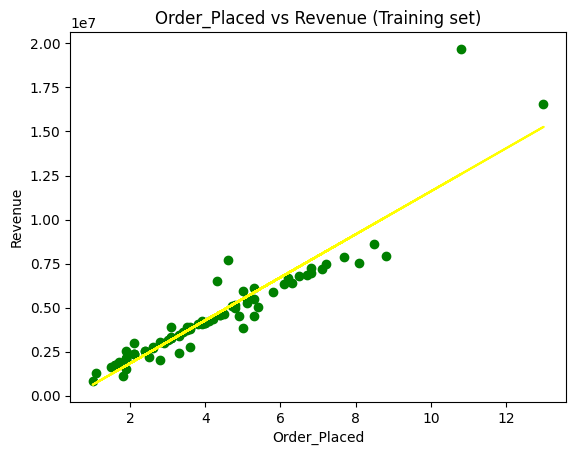

In [85]:
plt.scatter(x_train,y_train,color='green')
plt.plot(x_train,lr.predict(x_train.values.reshape(-1,1)),color='yellow')
plt.title('Order_Placed vs Revenue (Training set)')
plt.xlabel('Order_Placed')
plt.ylabel('Revenue')
plt.show()

# **Visualizing the Training set result**

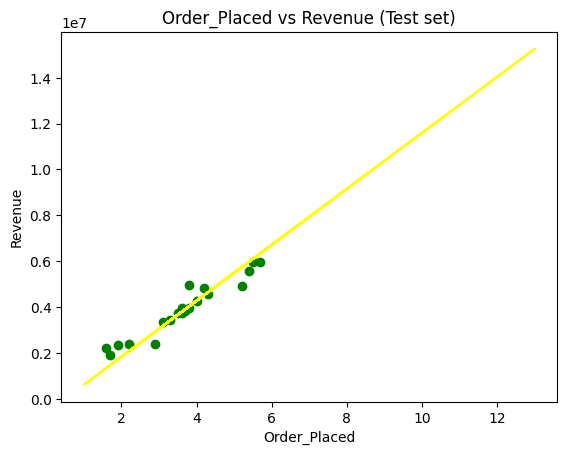

In [86]:
plt.scatter(x_test,y_test,color='green')
plt.plot(x_train,lr.predict(x_train.values.reshape(-1,1)),color='yellow')
plt.title('Order_Placed vs Revenue (Test set)')
plt.xlabel('Order_Placed')
plt.ylabel('Revenue')
plt.show()

**Accuracy of the Model**

In [95]:
from sklearn.metrics import r2_score


In [106]:
r2 = r2_score(y_test, y_pred)*100


In [107]:
r2

87.2448199627059